In [37]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler

columns_ = [i+2 for i in range(27)]
train = pd.read_excel('D:/연구/인공지능/Generalizable model/Preprocessing/Pembrolizumab_Inputdataset_0616.xlsx', usecols= columns_)
label = train['Label']
train.drop('Label', axis=1, inplace=True)
train.drop('Reported by pregnancy', axis=1, inplace=True)
train.drop('Reported by different use pattern', axis=1, inplace=True)
print(f'train samples: {len(train)}, label samples: {len(label)}')
print(f'number of features: {len(train.columns)}')
count = label.value_counts()
print(count)
print(227/879, (879-227)/879)
train.head()

train samples: 879, label samples: 879
number of features: 24
1    666
0    213
Name: Label, dtype: int64
0.2582480091012514 0.7417519908987485


,System organ class,Total_num_case,Healthcare_pro,Study_report,Temp_pos,Rechall_pos,Dechall_pos,Pediatrics,Adults,Elderly,...,Seriousness2,Seriousness3,Outcome1,Outcome2,Outcome3,Interacting,ROR lower 95%,EBGM lower 95%,Vigigrade upper 80%,Vigigrade between 50% and 80%
0,15,5601,4217,2420,1709,7,114,9,1690,2069,...,3061,968,149,431,1247,3,6.742,7.72,443,648
1,8,3294,2352,1906,683,4,168,1,1018,1469,...,1843,1145,356,475,14,4,1.690,1.72,102,610
2,8,2748,1857,1393,1117,0,0,10,685,982,...,4,198,0,2,2047,1,2.989,3.80,374,604
3,7,2016,1533,934,710,11,374,0,576,918,...,1019,798,629,212,10,2,0.675,0.87,241,490
4,22,1670,1217,617,477,12,296,0,487,639,...,674,877,519,211,4,1,1.054,1.12,152,305


In [39]:
#print(f'mean value\n')
#print(f'{train.mean()}\n')
#print(f'var value\n')
#print(f'{train.var()}\n')

In [6]:
# Standardization
scaler = StandardScaler()
scaler.fit(train.iloc[:,1:23])
train_stand = scaler.transform(train.iloc[:,1:23]) # returns numpy
print(f'data type: {type(train_stand)}')
train_stand_ = pd.DataFrame(train_stand) # convert to dataframe
print(f'data type: {type(train_stand_)}')

print(f'mean value\n')
print(f'{train_stand_.mean()}\n')
print(f'var value\n')
print(f'{train_stand_.var()}\n')

In [40]:
# Stratified K Folds, train, val set ratio = 0.8: 0.2
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE # Import SMOTE function

skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=1004)
k_folded_data = list(skf.split(train, label)) # returns 5 tuples with index of (train_index, test_index)
print(f'Stratified Samples: {len(k_folded_data)}')

def data_split(train, train_index, test_index, selected_features = []):
    selected_features = np.array(selected_features)
    if len(selected_features):
        train_x, val_x = train.iloc[train_index].iloc[:, selected_features], train.iloc[test_index].iloc[:, selected_features]
        train_y, val_y = label.iloc[train_index], label.iloc[test_index]
    else:
        train_x, val_x = train.iloc[train_index], train.iloc[test_index]
        train_y, val_y = label.iloc[train_index], label.iloc[test_index]
    return train_x.reset_index(drop=True), train_y.reset_index(drop=True), val_x.reset_index(drop=True), val_y.reset_index(drop=True)

# data_split test
train_index = k_folded_data[0][0]
test_index = k_folded_data[0][1]

train_x, train_y, val_x, val_y  = data_split(train, train_index, test_index)

#모델설정
sm = SMOTE(random_state=0)

# train데이터를 넣어 복제함
x_resampled, y_resampled = sm.fit_resample(train_x, train_y)

print(f'Train samples: {len(train_x)} ({(round(len(train_x)/len(train),2)*100)}%)')
print(f'Valid samples: {len(val_x)} ({(round(len(val_x)/len(train),2)*100)}%)')
print(f'Number of features: {len(train_x.columns)}')
train_x.head()

Stratified Samples: 4
Train samples: 659 (75.0%)
Valid samples: 220 (25.0%)
Number of features: 24


,System organ class,Total_num_case,Healthcare_pro,Study_report,Temp_pos,Rechall_pos,Dechall_pos,Pediatrics,Adults,Elderly,...,Seriousness2,Seriousness3,Outcome1,Outcome2,Outcome3,Interacting,ROR lower 95%,EBGM lower 95%,Vigigrade upper 80%,Vigigrade between 50% and 80%
0,15,5601,4217,2420,1709,7,114,9,1690,2069,...,3061,968,149,431,1247,3,6.742,7.72,443,648
1,8,3294,2352,1906,683,4,168,1,1018,1469,...,1843,1145,356,475,14,4,1.690,1.72,102,610
2,7,2016,1533,934,710,11,374,0,576,918,...,1019,798,629,212,10,2,0.675,0.87,241,490
3,22,1670,1217,617,477,12,296,0,487,639,...,674,877,519,211,4,1,1.054,1.12,152,305
4,7,1624,1223,896,451,6,162,1,671,578,...,948,486,356,163,6,5,0.370,0.34,123,340


In [41]:
from sklearn.metrics import roc_auc_score, roc_curve # Import function for estimating performance
from sklearn.model_selection import GridSearchCV, StratifiedKFold # Import function for cross-validation and hyperparameter tuning
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, f1_score, precision_recall_curve, roc_curve, auc 
import warnings
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [42]:
import xgboost as xgb
from xgboost import XGBClassifier #Import gradient boosting machine

#Training gradient boosting machine algorithm by using training set
xgb1 = XGBClassifier()

xgb_params_grid = {
         'n_estimators':[1000], 'eta':[0.01],
       # 'max_depth':[10], 'min_child_weight':[10], 'gamma':[1], 
       # 'colsample_bytree':[0.9], 
         'random_state':[111]
        }

skf_infli = StratifiedKFold(n_splits=10, shuffle=True, random_state=1004) #10-fold cross validation

xgb1 = GridSearchCV(xgb1, param_grid=xgb_params_grid, scoring="accuracy", cv=skf_infli, n_jobs = -1, verbose = -1)
xgb1 = xgb1.fit(x_resampled, y_resampled)

print("Best performance : {0:.4f}".format(xgb1.best_score_))
print("Best parameters: ", xgb1.best_params_)

Best performance : 0.8930
Best parameters:  {'eta': 0.01, 'n_estimators': 1000, 'random_state': 111}


검증데이터셋에서 AUROC: 0.8869
검증데이터셋에서 AUPRC: 0.9455
검증데이터셋에서 F1: 0.8812


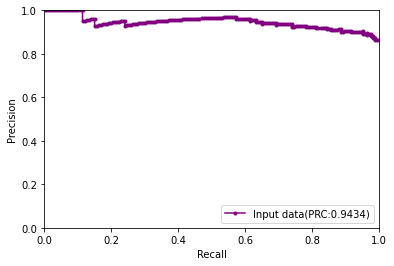

In [43]:
def plot_prc_curve_data(recall,precision,label=None):
    plt.plot(recall, precision, marker='.', color='purple', label=label)
    plt.axis([0,1,0,1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="lower right")
    
xgb_roc_score = roc_auc_score(val_y, xgb1.predict_proba(val_x)[:,1], average='macro')

xgb_probs = xgb1.predict_proba(val_x)[:,1]
y_hat = xgb1.predict(val_x)
xgb_precision, xgb_recall, _ = precision_recall_curve(val_y,xgb_probs)
xgb_f1, xgb_auprc = f1_score(val_y,y_hat), auc(xgb_recall,xgb_precision)

print('검증데이터셋에서 AUROC: %.4f' % (xgb_roc_score)) 
print('검증데이터셋에서 AUPRC: %.4f' % (xgb_auprc))
print('검증데이터셋에서 F1: %.4f' % (xgb_f1))

plot_prc_curve_data(xgb_recall, xgb_precision,label='Input data(PRC:0.9455)')
plt.legend(loc="lower right")
plt.savefig('DATASET', dpi=300)
plt.show()

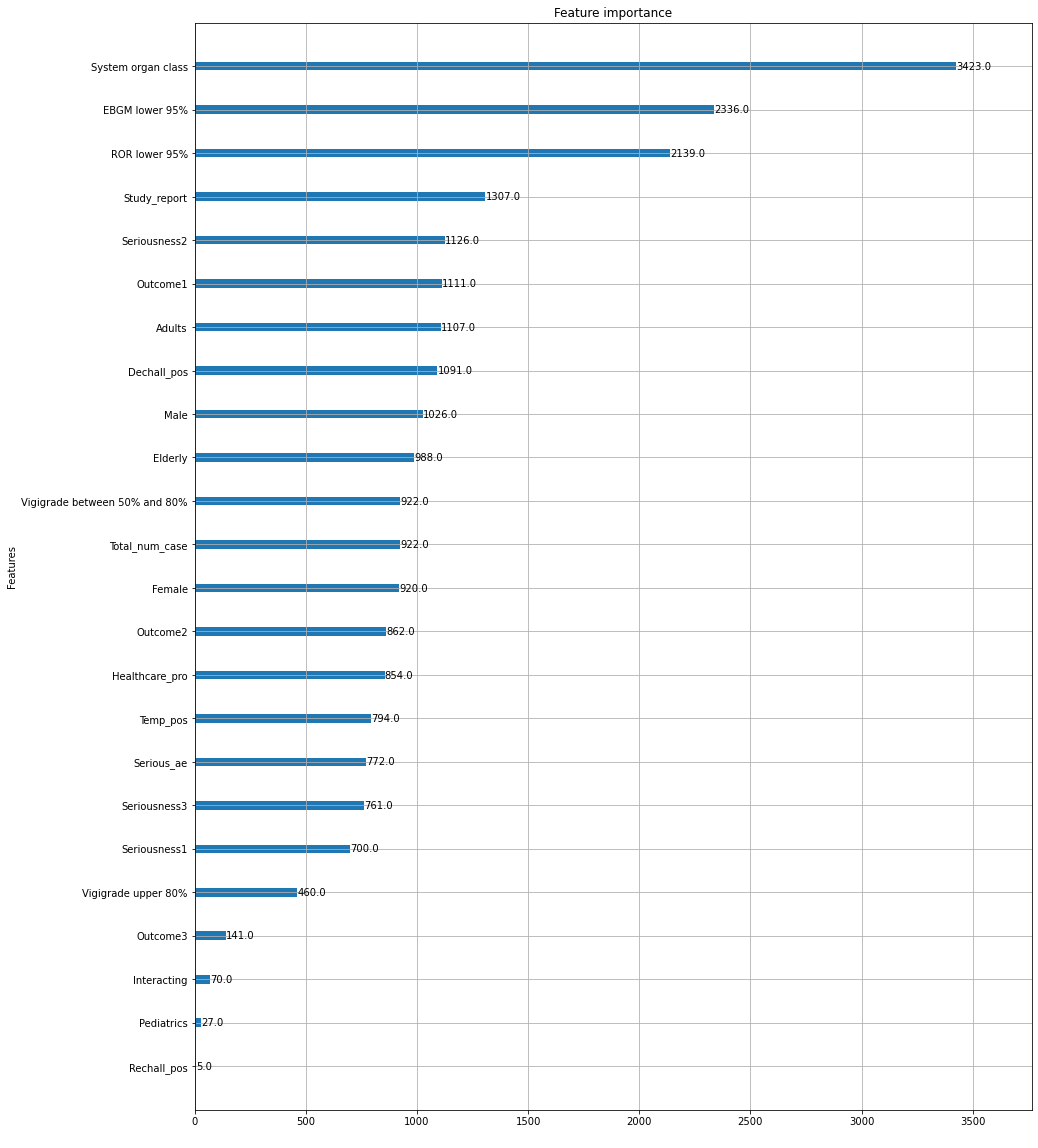

In [44]:
import xgboost

fig, ax = plt.subplots(figsize=(15,20))
xgboost.plot_importance(xgb1.best_estimator_, xlabel = ' ', title = 'Feature importance', ax=ax)
plt.savefig('F_importance_data1', dpi=300)